In [2]:
import pandas as pd
import numpy as np

In [3]:
# información dada
data = pd.ExcelFile("data/datos_contugas.xlsx")

#Como la información está distribuida por hoja, para cada cliente, se desea juntar toda la información en una sola tabla
#lista para almacenar los datos de cada hojoa

all_data = []

# iteración para extraer la información de cada hoja como Dataframe y añadirlo en la lista
for sheet_name in data.sheet_names:
    df = pd.read_excel("data/datos_contugas.xlsx", sheet_name= sheet_name)
    df['Cliente'] = sheet_name
    all_data.append(df)
 
 #Juntar todo la información en un solo dataframe
combined_data = pd.concat(all_data, ignore_index=True)

combined_data['Cliente'] = combined_data['Cliente'].astype(str).str.strip()
combined_data


,Fecha,Presion,Temperatura,Volumen,Cliente
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1
...,...,...,...,...,...
847955,2023-12-31 19:00:00,15.751139,27.460652,204.457549,CLIENTE20
847956,2023-12-31 20:00:00,15.614858,27.010382,186.512096,CLIENTE20
847957,2023-12-31 21:00:00,15.598944,26.709100,204.456461,CLIENTE20
847958,2023-12-31 22:00:00,15.730040,27.266090,203.695596,CLIENTE20


In [4]:
#Conocer alguna información por cliente

#Definir cuartiles
def q1(x):
    return x.quantile(0.25)
def q2(x):
    return x.median()
def q3(x):
    return x.quantile(0.75)


registro_fecha = combined_data.groupby('Cliente', as_index=False).agg(
    registros=('Cliente', 'count'),
    fecha_min=('Fecha', 'min'), 
    fecha_max=('Fecha', 'max'))

registro_fecha




,Cliente,registros,fecha_min,fecha_max
0,CLIENTE1,43412,2019-01-14,2023-12-31 23:00:00
1,CLIENTE10,41059,2019-01-14,2023-12-31 23:00:00
2,CLIENTE11,42248,2019-01-14,2023-12-31 23:00:00
3,CLIENTE12,41776,2019-01-14,2023-12-31 23:00:00
4,CLIENTE13,41059,2019-01-14,2023-12-31 23:00:00
5,CLIENTE14,43415,2019-01-14,2023-12-31 23:00:00
6,CLIENTE15,42428,2019-01-14,2023-12-31 23:00:00
7,CLIENTE16,43147,2019-01-14,2023-12-31 23:00:00
8,CLIENTE17,43412,2019-01-14,2023-12-31 23:00:00
9,CLIENTE18,41382,2019-01-14,2023-12-31 23:00:00


In [5]:
#registros nulos por cliente

# Contar registros nulos agrupados por cliente
null_counts = combined_data.groupby('Cliente').apply(lambda x: x.isnull().sum())
null_counts

/var/folders/tt/dfgryyx95ws5bs89by36yt4m0000gn/T/ipykernel_61975/3962228228.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_counts = combined_data.groupby('Cliente').apply(lambda x: x.isnull().sum())


,Fecha,Presion,Temperatura,Volumen,Cliente
Cliente,,,,,
CLIENTE1,0,0,0,0,0
CLIENTE10,0,0,0,0,0
CLIENTE11,0,0,0,0,0
CLIENTE12,0,0,0,0,0
CLIENTE13,0,0,0,0,0
CLIENTE14,0,0,0,0,0
CLIENTE15,0,0,0,0,0
CLIENTE16,0,0,0,0,0
CLIENTE17,0,0,0,0,0


* Los registros de los medidores de los clientes industriales para todos los casos se tomaron entre el 14 de enero de 2019 hasra el 31 de dicimebre de 2019, hasta las 11PM.
* No hay datos nulos para ningún cliente.

In [6]:
#datos volumen
volumen = combined_data.groupby('Cliente').agg(
    registros=('Cliente', 'count'),
     volumen_mean=('Volumen', 'mean'),
    volumen_std=('Volumen', 'std'),
    volumen_min=('Volumen', 'min'),
    volumen_q1=('Volumen', q1),
    volumen_median=('Volumen', q2),
    volumen_q3=('Volumen', q3),
    volumen_max=('Volumen', 'max')
)
    
volumen

,registros,volumen_mean,volumen_std,volumen_min,volumen_q1,volumen_median,volumen_q3,volumen_max
Cliente,,,,,,,,
CLIENTE1,43412,19.976401,7.939171,0.0,16.248989,22.470213,25.533223,65.936644
CLIENTE10,41059,11.788209,43.991880,0.0,0.000000,0.000000,0.000000,247.072990
CLIENTE11,42248,131.648637,34.225487,0.0,110.646887,136.075518,155.613085,298.259573
CLIENTE12,41776,33.731496,41.952033,0.0,0.000000,0.000000,77.654802,284.475087
CLIENTE13,41059,10.276088,41.184079,0.0,0.000000,0.000000,0.000000,253.867916
CLIENTE14,43415,7.301900,5.257558,0.0,3.097458,6.749423,10.871643,36.793150
CLIENTE15,42428,12.553861,47.565636,0.0,0.000000,0.000000,0.000000,398.042027
CLIENTE16,43147,178.133946,74.649969,0.0,114.279073,210.869993,231.370549,409.872212
CLIENTE17,43412,20.564425,5.566153,0.0,18.426473,21.748120,24.243031,48.504833


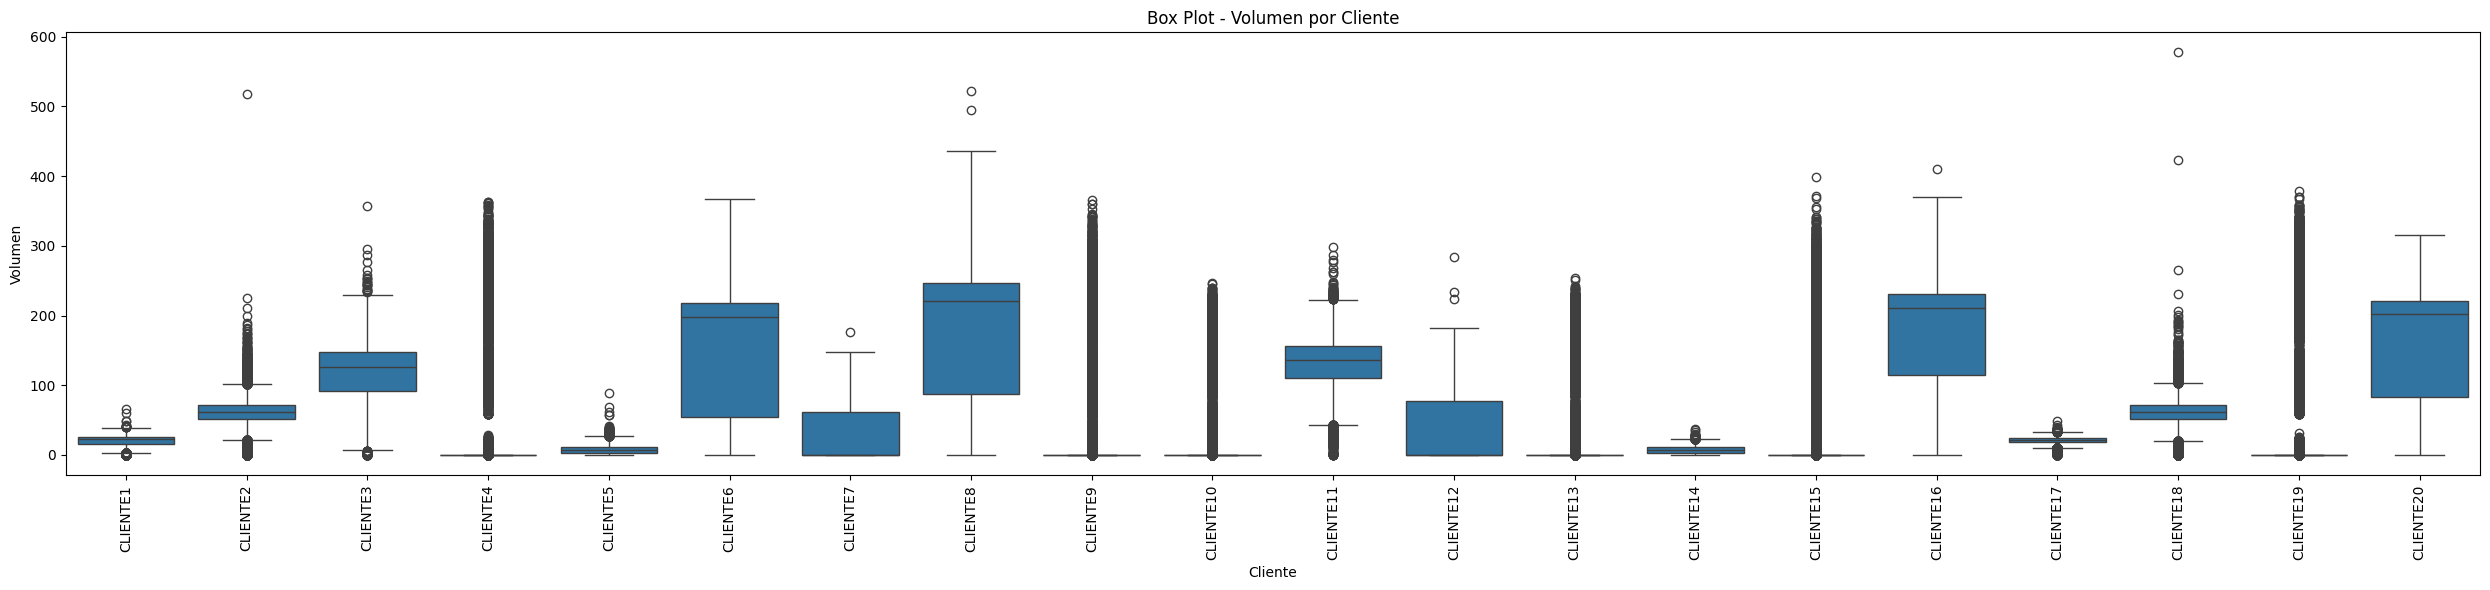

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(25, 6))
sns.boxplot(data=combined_data, x='Cliente', y='Volumen')

plt.title(f'Box Plot - Volumen por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Volumen')
plt.xticks(rotation=90)
plt.tight_layout()


plt.show()

* Para los clientes 4, 9, 10, 13, 15 y 19, el valor del cuartil 1, la mediana y el cuartil 3 es cero o cercano a cero. Presenta una gran cantidad de valores atípicos. 
* Los demás clientes logran conformar la caja del gráfico, mostrando para algunos casos algunos valores atípicos.
* ¿Estos valores atípicos son los que deberíamos considerar como anomalías?

In [8]:
#datos presion
presion = combined_data.groupby('Cliente').agg(
    registros=('Cliente', 'count'),
    presion_mean=('Presion', 'mean'),
    presion_std=('Presion', 'std'),
    presion_min=('Presion', 'min'),
    presion_q1=('Presion', q1),
    presion_median=('Presion', q2), 
    presion_q3=('Presion', q3),
    presion_max=('Presion', 'max')
)
    
presion

,registros,presion_mean,presion_std,presion_min,presion_q1,presion_median,presion_q3,presion_max
Cliente,,,,,,,,
CLIENTE1,43412,17.535934,0.358310,15.742337,17.590781,17.651439,17.711107,18.074274
CLIENTE10,41059,17.473694,0.134933,16.469864,17.421424,17.495303,17.564497,18.573079
CLIENTE11,42248,3.545512,0.082752,2.934873,3.490493,3.535771,3.587027,3.954039
CLIENTE12,41776,17.833667,0.418490,13.740922,17.538897,17.834866,18.106159,20.232110
CLIENTE13,41059,17.492521,0.120068,16.505077,17.457089,17.511078,17.563878,18.471047
CLIENTE14,43415,17.517128,0.369094,13.616877,17.568526,17.632941,17.684638,20.028395
CLIENTE15,42428,17.495812,0.139307,16.514496,17.471277,17.515236,17.563664,18.493234
CLIENTE16,43147,16.705058,0.492334,14.734521,16.347862,16.619526,17.023767,19.440780
CLIENTE17,43412,17.533599,0.380016,15.265703,17.581482,17.653419,17.720431,18.445378


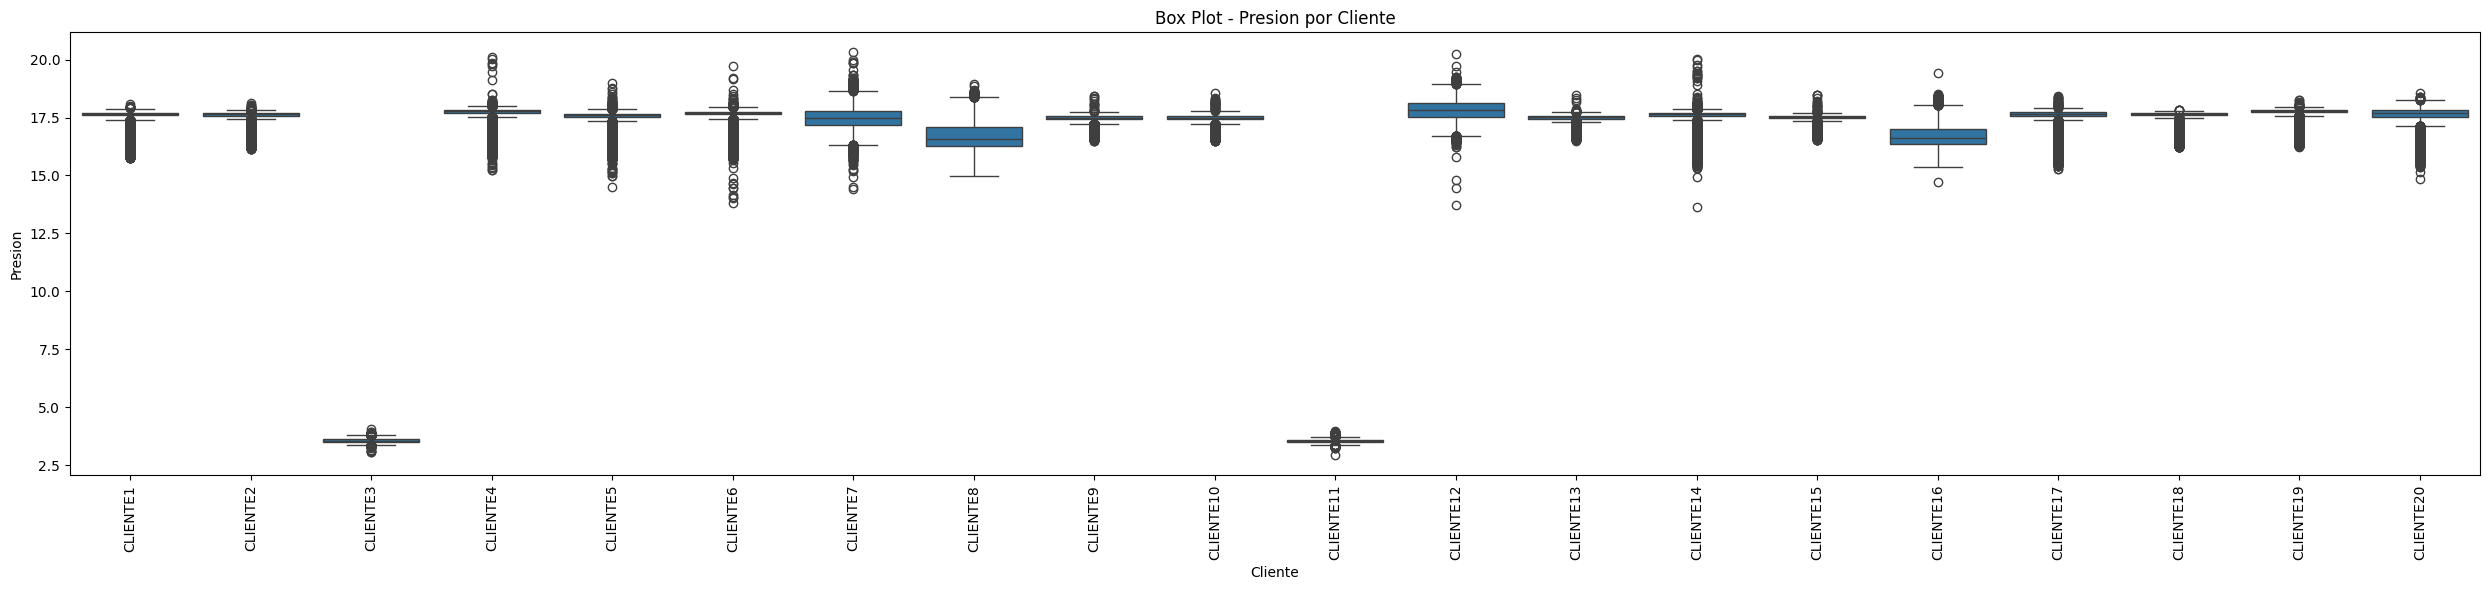

In [9]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=combined_data, x='Cliente', y='Presion')

plt.title(f'Box Plot - Presion por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Presion')
plt.xticks(rotation=90)
plt.tight_layout()


plt.show()

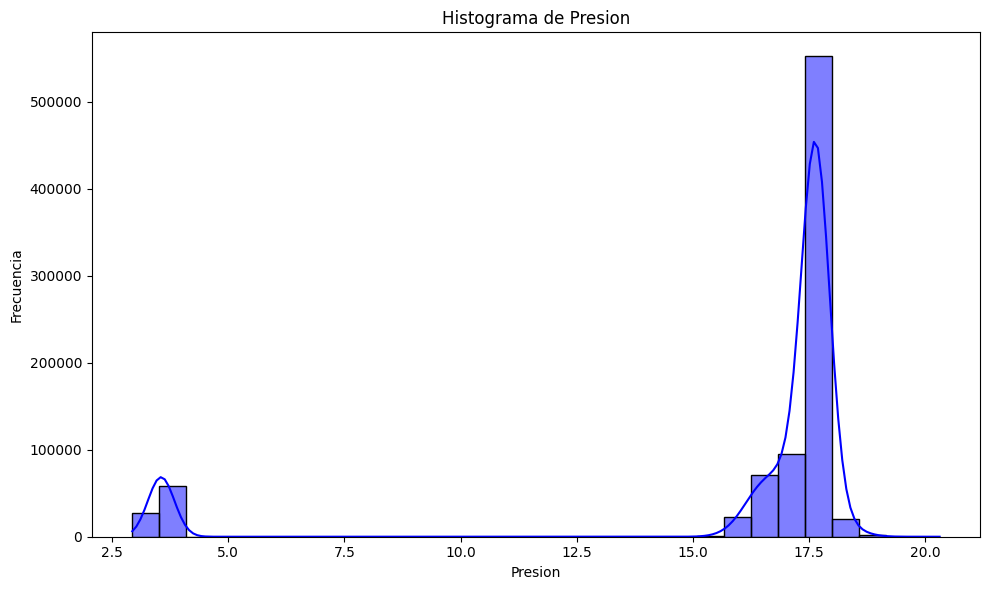

In [10]:
#Histograma Presion

plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='Presion', kde=True, bins=30, color='blue')

# Personalizar el gráfico
plt.title(f'Histograma de Presion')
plt.xlabel('Presion')
plt.ylabel('Frecuencia')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

* Para todos los clientes, a excepción de los clientes 3 y 11, la mediana de la presión tiene valores entre 16 y 18. Y sus mínimos no son inferiores a 13. Teniendo valores muy diferentes a los demás clientes.
* El cliente 3 tiene un mínimo de 3.057, una mediana de 3.559, un promedio de 3.5695 y un máximo de 4.037, siendo valores muy cercanos, mostrando poca dispersión.
* El cliente 11 tiene un mínimo de 2.9348, una mediana de 3.5357, un promedio de 3.5455 y un máximo de 3.954, siendo valores muy cercanos, mostrando poca dispersión.
* Para todos los clientes la desviación estándar es menor que 1, lo que representa que la presión es regulada y se mantiene constante. 
* Para todos los casos 50% de los datos (cajas en los gráficos) están altamente concentrados cerca de la mediana, ya que las cajas tienen poco rango.
* Los clientes que mayor rango tienen entre el cuartil 1 y 3 son 7, 8, 12 y 16.
* Hay valores atípicos para todos los casos.
* No contamos información sobre las características de la tubería o su profundidad, y puede que sean relevantes para comprender la variación de la presión y sus valores permitidos.


In [11]:
#datos temperatura
temperatura = combined_data.groupby('Cliente').agg(
    registros=('Cliente', 'count'),
    temperatura_mean=('Temperatura', 'mean'),
    temperatura_std=('Temperatura', 'std'),
    temperatura_min=('Temperatura', 'min'),
    temperatura_q1=('Temperatura', q1),
    temperatura_median=('Temperatura', q2),
    temperatura_q3=('Temperatura', q3),
    temperatura_max=('Temperatura', 'max') )
    
temperatura

,registros,temperatura_mean,temperatura_std,temperatura_min,temperatura_q1,temperatura_median,temperatura_q3,temperatura_max
Cliente,,,,,,,,
CLIENTE1,43412,25.575853,2.756246,15.401803,23.587235,25.711326,27.695776,32.869112
CLIENTE10,41059,23.500489,2.614474,14.291032,21.319390,23.535509,25.593807,35.069721
CLIENTE11,42248,26.307152,2.695036,13.731025,24.048241,26.198136,28.569625,34.355276
CLIENTE12,41776,26.689551,4.998354,-5.257899,22.217786,27.049023,31.144009,50.019853
CLIENTE13,41059,21.591365,2.848899,12.240511,19.233546,21.570406,23.941859,29.753364
CLIENTE14,43415,26.658520,4.967158,5.676933,22.873489,26.536903,29.860792,45.378176
CLIENTE15,42428,24.026489,3.106018,14.712874,21.565131,24.113353,26.399282,35.661349
CLIENTE16,43147,27.481311,2.447194,19.146101,25.683355,27.501598,29.654472,32.658456
CLIENTE17,43412,25.849342,2.364020,18.445096,23.898700,25.764589,27.929240,31.917560


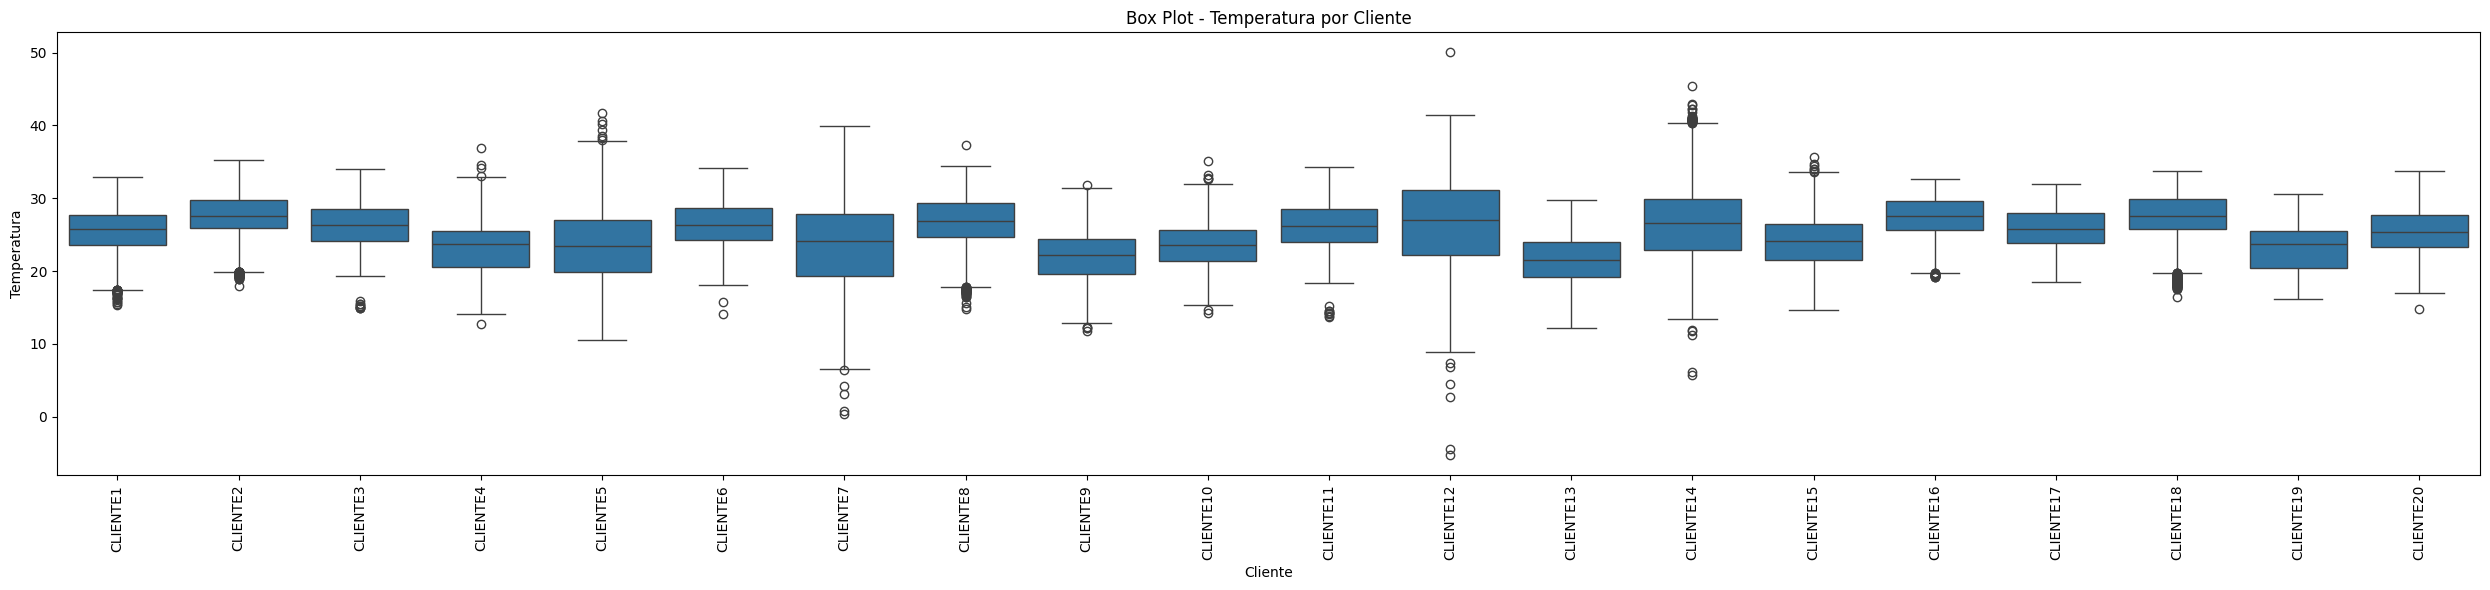

In [12]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=combined_data, x='Cliente', y='Temperatura')

plt.title(f'Box Plot - Temperatura por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Temperatura')
plt.xticks(rotation=90)
plt.tight_layout()


plt.show()

In [13]:
# estadísticas descriptivas generales de Temperatura
estadisticas_temperatura = combined_data['Temperatura'].describe()
estadisticas_temperatura

count    847960.000000
mean         25.198239
std           3.790497
min          -5.257899
25%          22.693027
50%          25.379859
75%          27.886244
max          50.019853
Name: Temperatura, dtype: float64

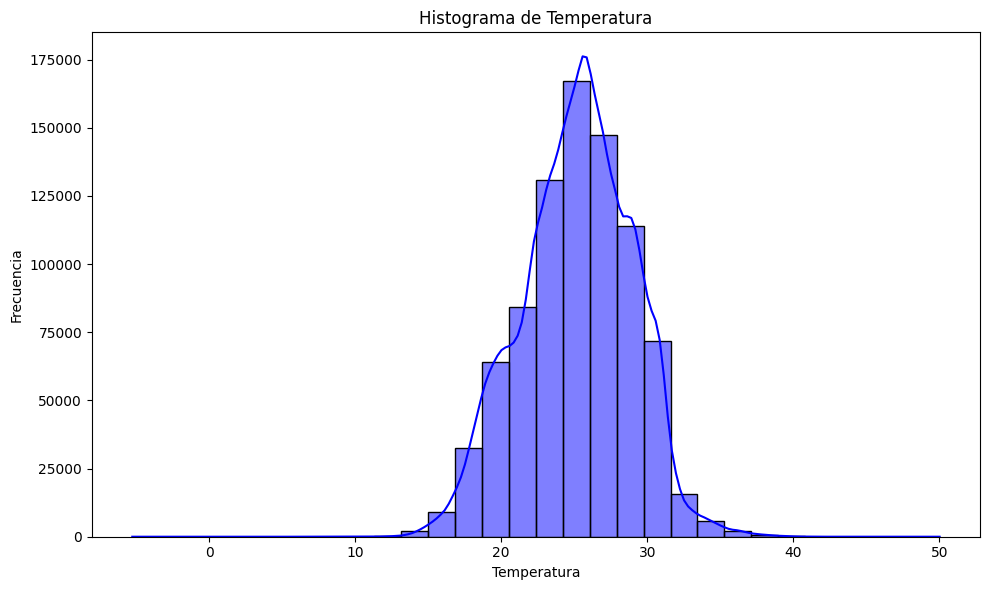

In [14]:
#Histograma Temperatura

plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='Temperatura', kde=True, bins=30, color='blue')

# Personalizar el gráfico
plt.title(f'Histograma de Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

* Se observa que el comportamiento de temperatura para cada cliente, a pesar de que no es el mismo, muestra para la mayoría de los clientes que el 50% de sus datos están entre 20 y 30 de temperatura.
* Se revisa entonces el comportamiento de todos los registros de temperatura, sin agrupar por cliente y se observa que:
    * El promedio (25.20) es muy cercano y ligeramente menor que la mediana (25.38), mostrando una simetría en los datos. 
    * Se puede decir que la temperatura funciona en un rango estable para los clientes.
* Se desconoce la profundidad a la que operan las tuberías, que puede indicar la temperatura mínima y máxima a la que debería permanecer la temperatura. 
* Hay clientes que tienen valores atípicos.

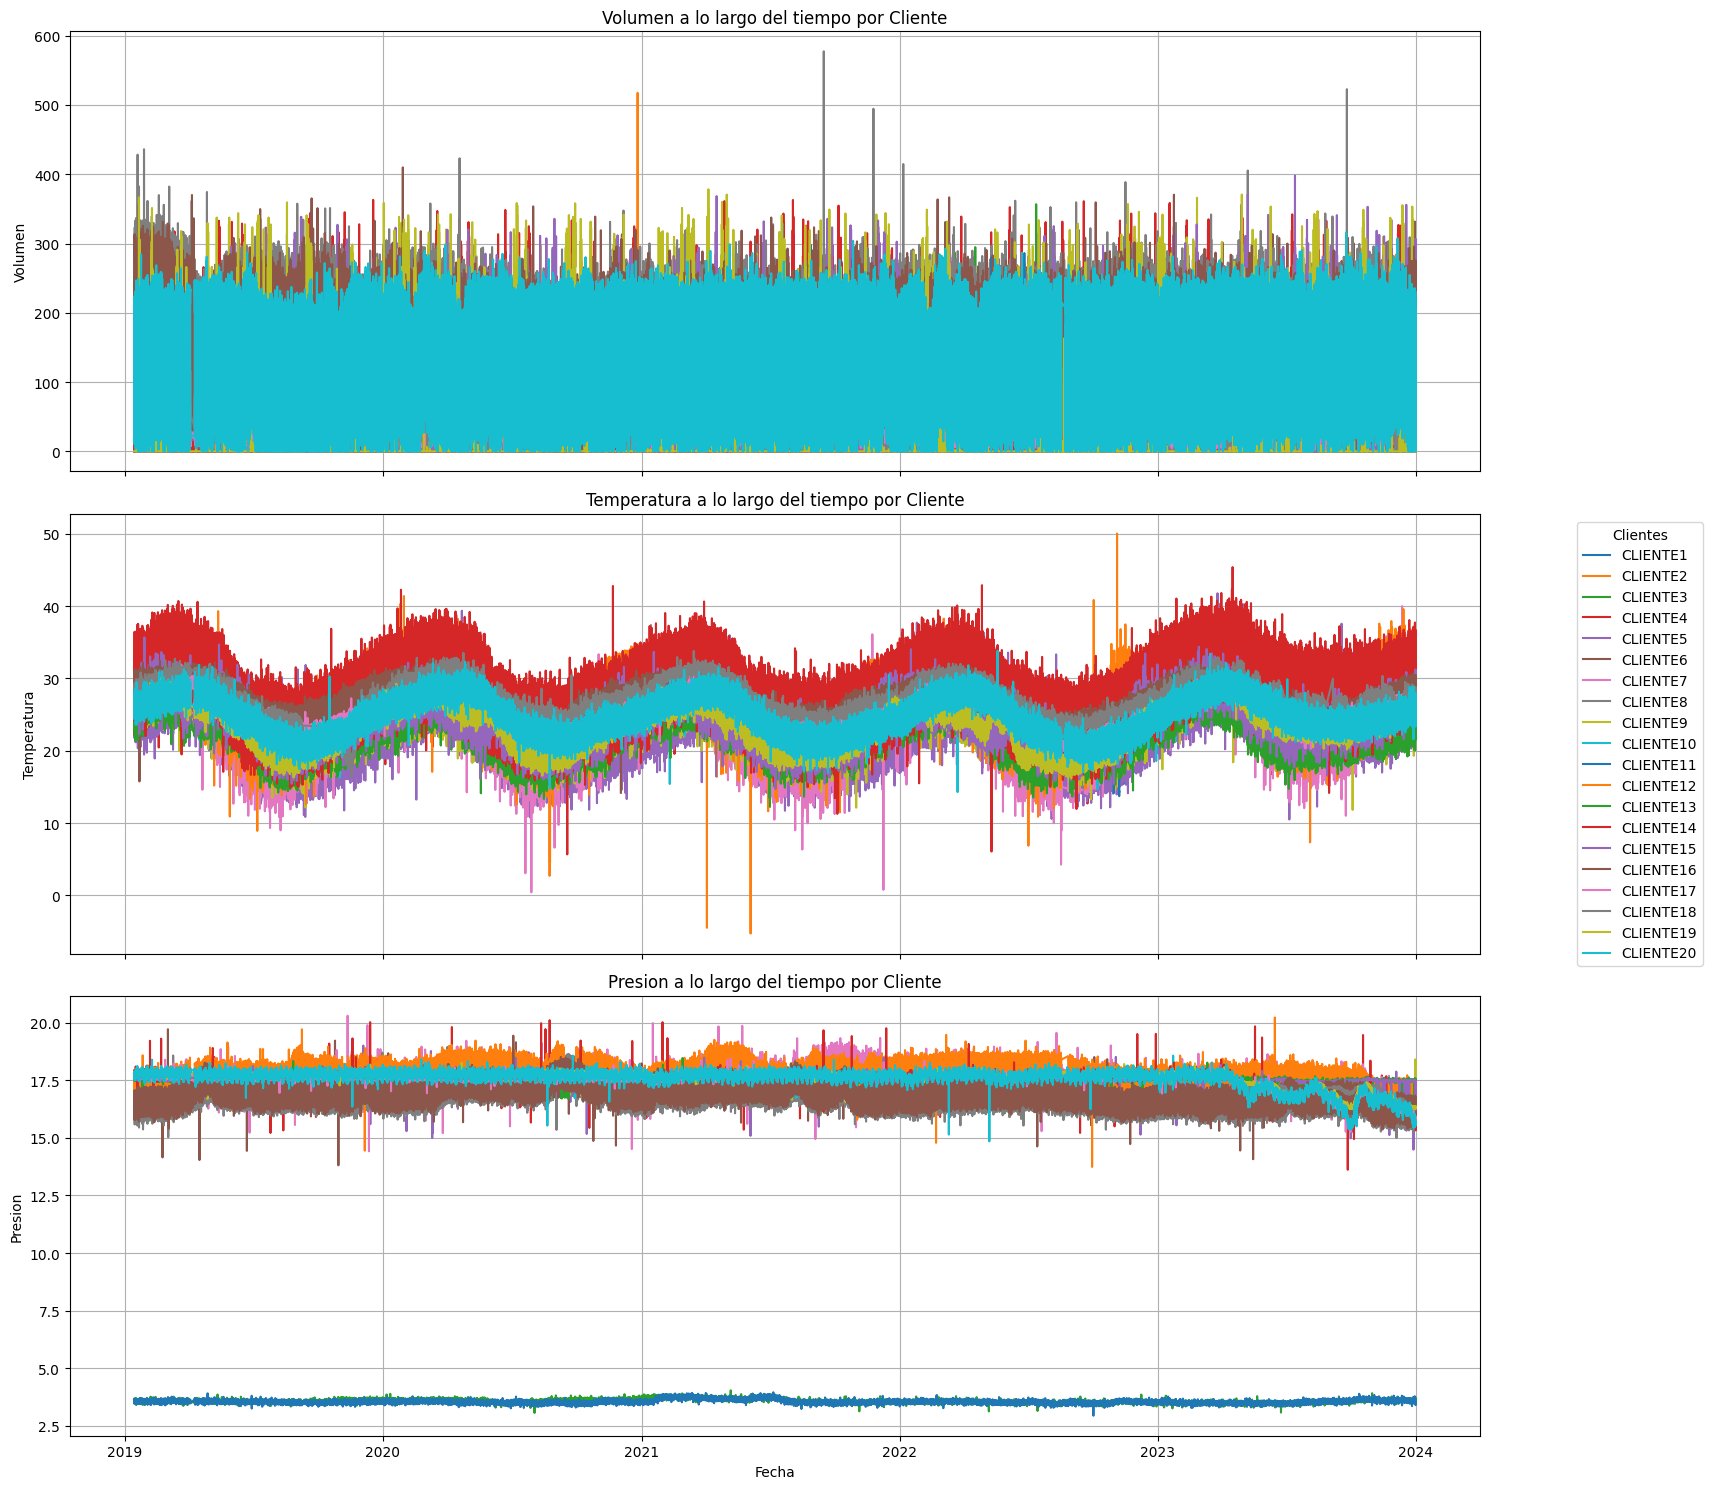

In [15]:
# Gráficas de variables a lo largo dle tiemopo

variables = ['Volumen', 'Temperatura', 'Presion'] 

# Crear una figura y subgráficos
fig, axes = plt.subplots(len(variables), 1, figsize=(15, 15), sharex=True)

# Iterar sobre cada variable y graficar en su respectivo subplot
for i, variable in enumerate(variables):
    for cliente in combined_data['Cliente'].unique():
        cliente_data = combined_data[combined_data['Cliente'] == cliente]
        axes[i].plot(cliente_data['Fecha'], cliente_data[variable], label=cliente)
    
    # Personalizar cada subplot
    axes[i].set_title(f'{variable} a lo largo del tiempo por Cliente')
    axes[i].set_ylabel(variable)
    axes[i].grid()

# Personalizar el eje X (compartido)
axes[-1].set_xlabel('Fecha')

# Ajustar leyendas fuera del lienzo
fig.legend(combined_data['Cliente'].unique(), title='Clientes', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Ajustar diseño del gráfico
plt.tight_layout()
plt.show()

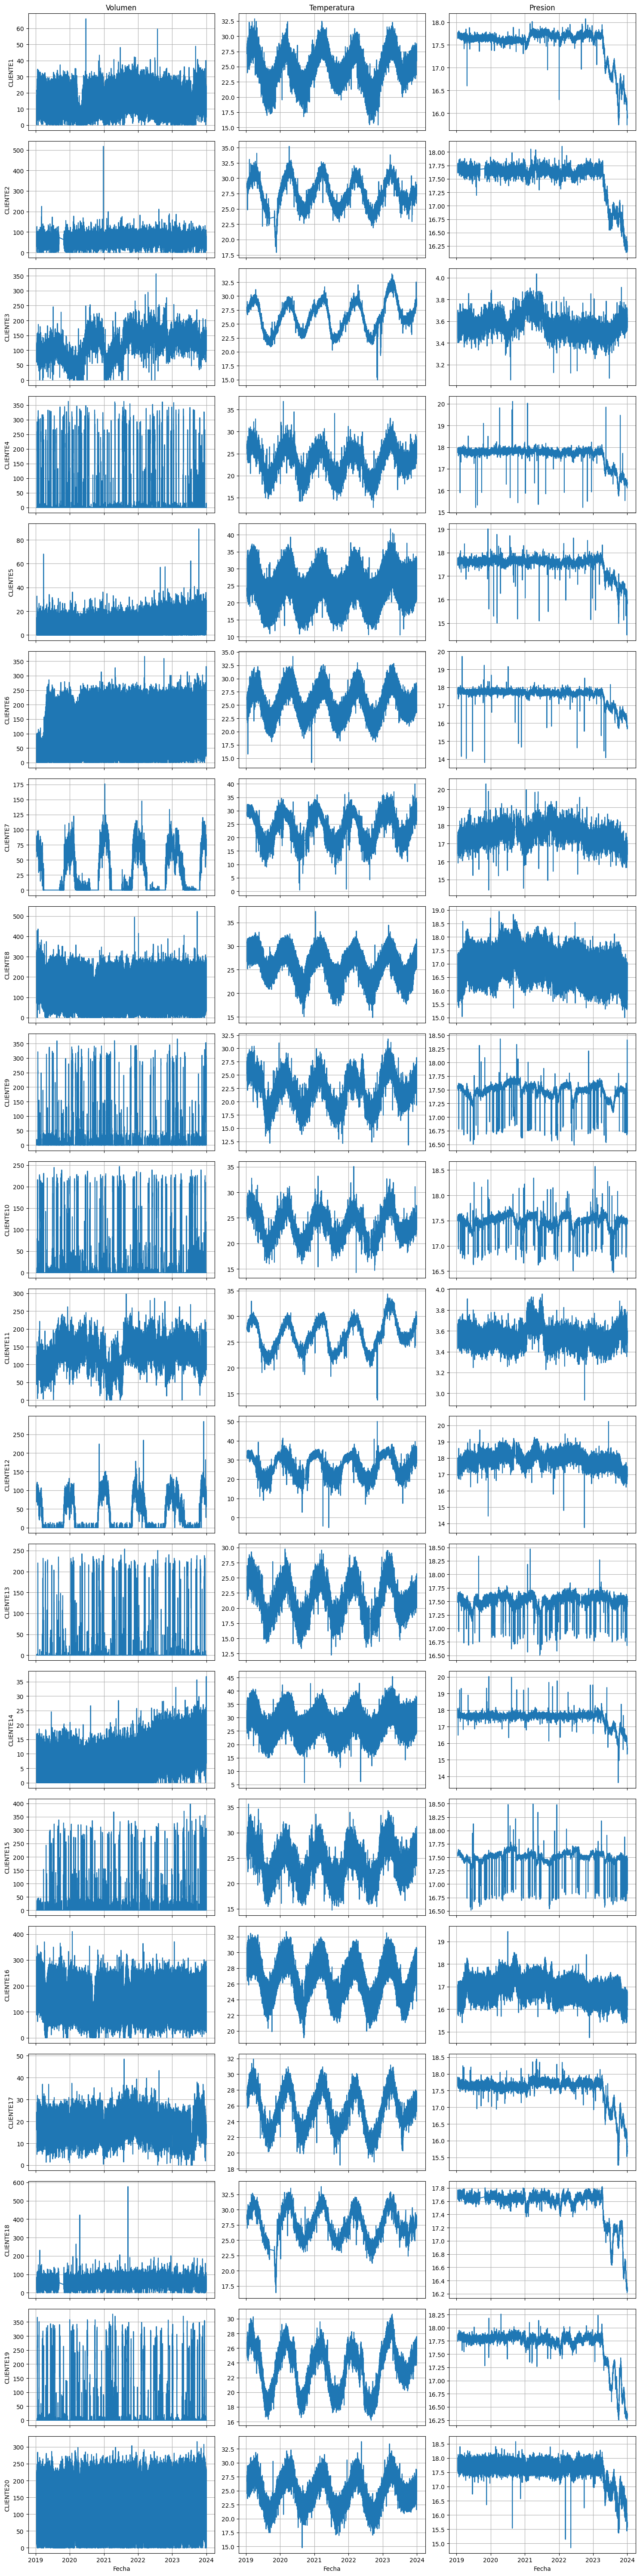

In [20]:
clientes = combined_data['Cliente'].unique() 

# Crear la figura y subgráficos
fig, axes = plt.subplots(len(clientes), len(variables), figsize=(15, len(clientes) * 3), sharex=True, sharey=False)

# Iterar por cada cliente y cada variable
for i, cliente in enumerate(clientes):
    cliente_data = combined_data[combined_data['Cliente'] == cliente]
    for j, variable in enumerate(variables):
        ax = axes[i, j] if len(clientes) > 1 else axes[j]  # Para manejar un solo cliente correctamente
        ax.plot(cliente_data['Fecha'], cliente_data[variable], label=variable)
        
        # Etiquetas y títulos
        if i == 0:
            ax.set_title(variable)  # Títulos de las columnas (variables)
        if j == 0:
            ax.set_ylabel(cliente)  # Etiquetas de filas (clientes)
        
        # Configuración del eje X
        if i == len(clientes) - 1:
            ax.set_xlabel('Fecha')
        
        ax.grid()

# Ajustar el diseño del lienzo
plt.tight_layout()
plt.show()

* Las gráficas de temperatura muestran un comportamiento oscilatorio para todos los casos, esto se debe a la temperatura exterior de la época del año?
* Los clientes 1, 2, 4, 5, 6, 14, 17, 18, 19 y 20, presentan una disminución en el registro de presión para el año 2023, que tiene un comportamiento descendiente desde que inicia el año hasta que termina.
* Los clientes 9, 10, 13 y 15, muestran una gran variabilidad en el registro de presión, a diferencia de los demás clientes.
* Los clientes 3, 7, 8, 11, 12 y 16, son quienes tienen un comportamiento más estable en cuanto a mediciones de presión. 
* Todos los clientes tienen alta variación en el registro de volumen.
* El cliente 2, no registro datos en el medidor para un periodo del año 2019.

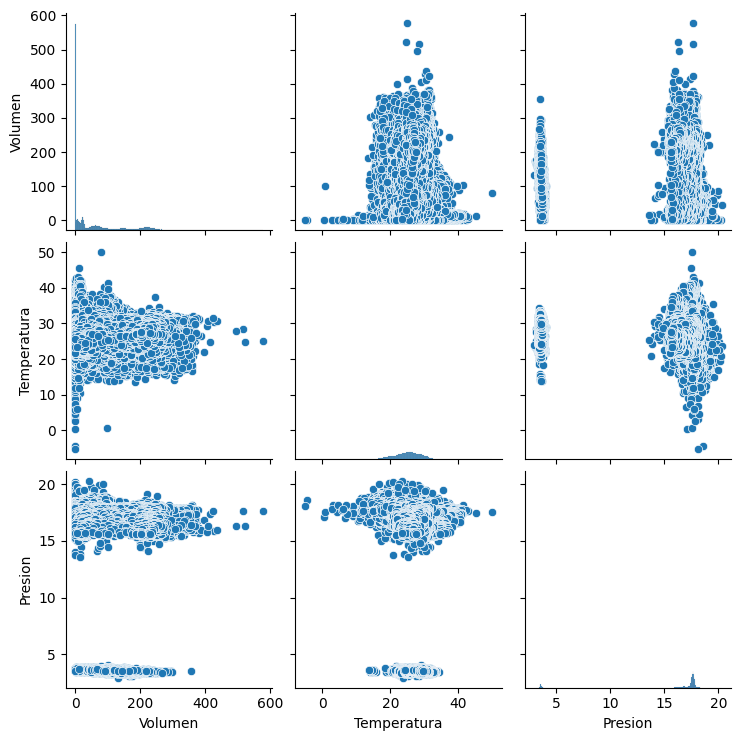

In [ ]:

sns.pairplot(combined_data, vars=variables, diag_kind='hist', kind='scatter')

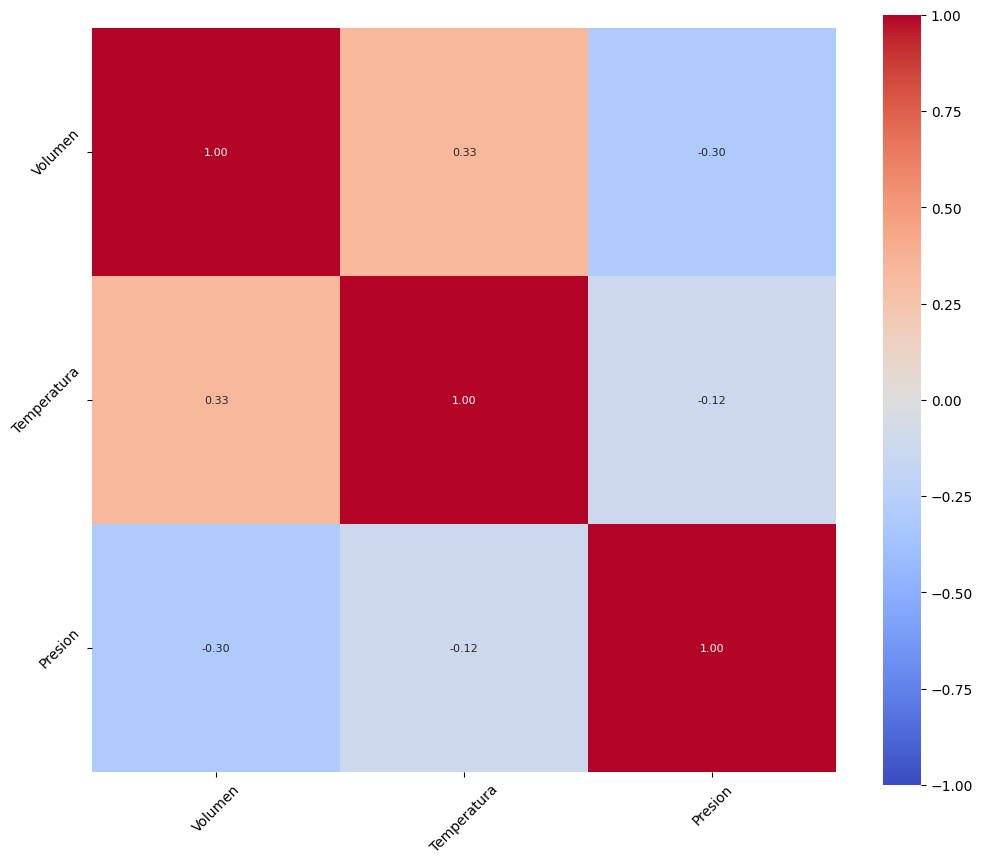

In [19]:
#correlación entre variables

corr = combined_data[variables].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1,
            cbar=True, square=True, annot_kws={'size': 8})
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

